#Case study on Pre-processing
## Do the following on titanic dataset.
### 1. Load the dataset into python environment
### 2. Make ‘PassengerId’ as the index column
### 3. Check the basic details of the dataset
### 4. Fill in all the missing values present in all the columns in the dataset
### 5. Check and handle outliers in at least 3 columns in the dataset
### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

### 1. Load the dataset into python environment

In [3]:
from google.colab import files
uploaded = files.upload()

Saving titanic_dataset.csv to titanic_dataset.csv


In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_set1=pd.read_csv('titanic_dataset.csv')
data_set1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### The above data set shows the details of Passengers in Titanic. The details include Passenger ID, Name, Gender, Age, Fare, Ticket, Cabin etc

### 2. Make ‘PassengerId’ as the index column

In [190]:
data_set1.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Now, PassengerId field acts as the index column

### 3. Check the basic details of the dataset

In [191]:
data_set1.shape

(891, 12)

In [192]:
data_set1.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [193]:
data_set1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### The above details are some of the basic details about the dataset. It has 891 rows and 12 columns. The Statistical details such as Mean, Standard Deviation, percentiles etc are as described in the above Table.
#### Also, the data set is not a clean data set. Some missing values are identified, which requires some preprocessing

### 4. Fill in all the missing values present in all the columns in the dataset

In [194]:
data_set1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### From the above result, null values are identified in the fields Age,Cabin and Embarked. Now, we will check for the data type of the fields

In [195]:
data_set1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### The Age field is a float field, Cabin and Embarked are Character fields. So, we have numerical and categorical data missing

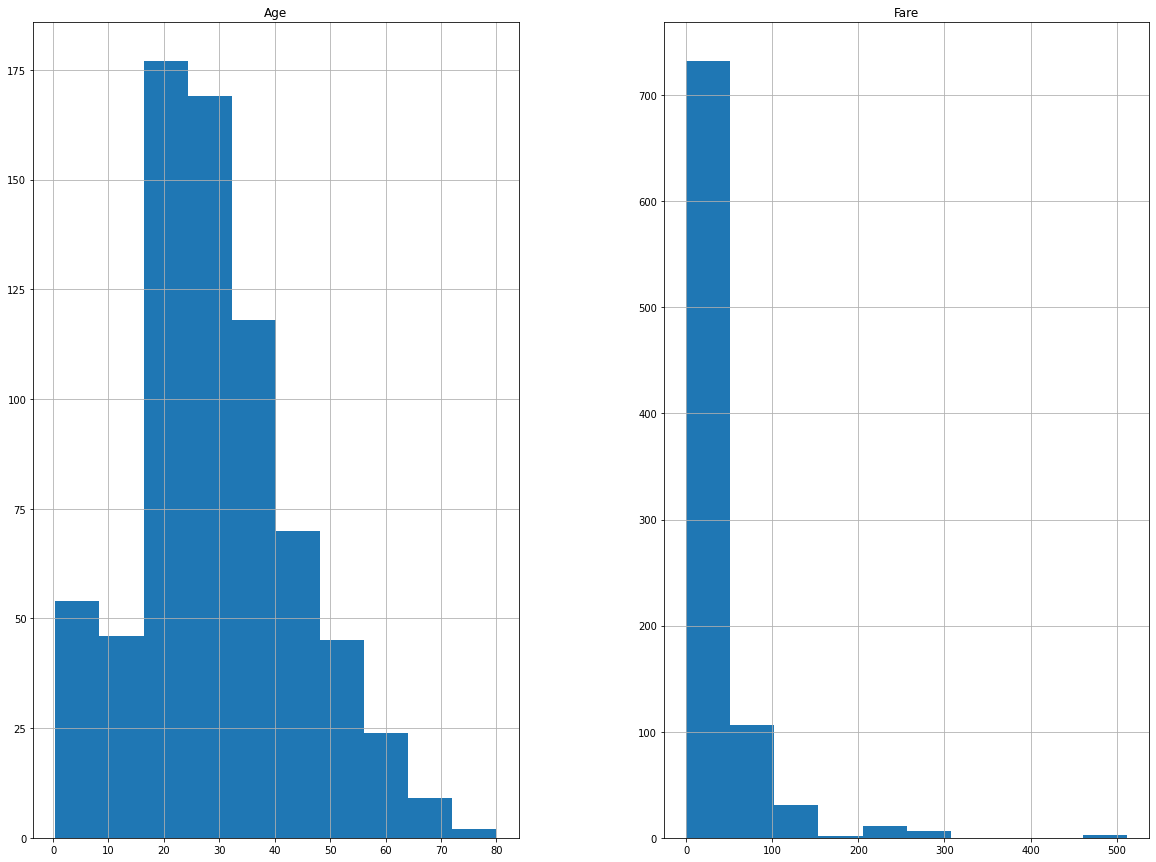

In [196]:
freqgraph=data_set1.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

#### The Age field shows right skewness, so we can go for Median value to fill the null records
#### The Categorical data can be filled using Mode value

In [197]:
data_set1['Age']=data_set1['Age'].fillna(data_set1['Age'].median())
data_set1['Cabin']=data_set1['Cabin'].fillna(data_set1['Cabin'].mode().iloc[0])
data_set1['Embarked']=data_set1['Embarked'].fillna(data_set1['Embarked'].mode().iloc[0])
data_set1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#### Thus, all the null values are handled.

### 5. Check and handle outliers in at least 3 columns in the dataset

#### Boxplots to identify outliers:
#### First, we can check with Age field

Text(0.5, 1.0, 'Box plot of Age')

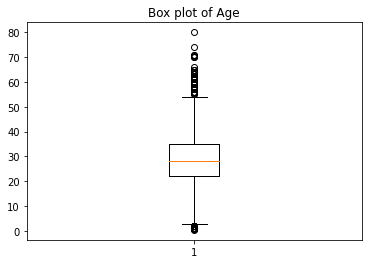

In [198]:
plt.boxplot(data_set1['Age'])
plt.title('Box plot of Age')

#### As shown in the figure, there are many outliers. Now we need to handle these values

In [199]:
Q1=np.percentile(data_set1['Age'],25,interpolation='midpoint')
Q2=np.percentile(data_set1['Age'],50,interpolation='midpoint')
Q3=np.percentile(data_set1['Age'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

Q1 =  22.0
Q2 =  28.0
Q3 =  35.0


In [200]:
IQR = Q3-Q1
low_lim = Q1-(1.5*IQR)
up_lim = Q3+(1.5*IQR)
print ('IQR =',IQR)
print ('Lower limit =',low_lim)
print ('Upper limit =',up_lim)
outlier = []
for x in data_set1['Age']:
  if ((x > up_lim) or (x < low_lim)): 
    outlier.append(x)
outlier

IQR = 13.0
Lower limit = 2.5
Upper limit = 54.5


[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

#### To find the index of the outliers:

In [201]:
ind1 = data_set1['Age'] < low_lim
data_set1.loc[ind1].index

Int64Index([  7,  16,  78, 119, 164, 172, 183, 205, 297, 305, 340, 381, 386,
            469, 479, 530, 642, 644, 755, 788, 803, 824, 827, 831],
           dtype='int64')

In [202]:
ind1=data_set1['Age'] > up_lim
data_set1.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [203]:
data_set1.drop([7,16,78,119,164,172,183,205,297,305,340,381,386,469,479,530,642,644,755,788,803,824,827,831,11,15,33,54,94,96,116,152,170,174,195,232,252,268,275,280,326,366,438,456,467,483,487,492,493,545,555,570,587,625,626,630,647,659,672,684,694,745,772,829,851,879],inplace=True)


Text(0.5, 1.0, 'Box plot of Age')

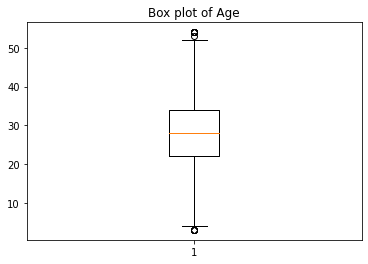

In [204]:
plt.boxplot(data_set1['Age'])
plt.title('Box plot of Age')

#### Next, we can check with SibSp field

Text(0.5, 1.0, 'Box plot of SibSp')

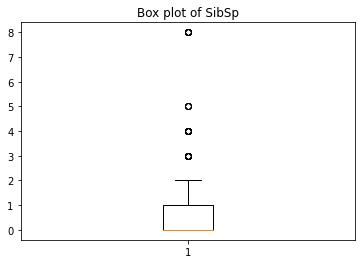

In [205]:
plt.boxplot(data_set1['SibSp'])
plt.title('Box plot of SibSp')

#### As shown in the figure, there are some outliers. Now we need to handle these values

In [206]:
Q1=np.percentile(data_set1['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data_set1['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data_set1['SibSp'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

Q1 =  0.0
Q2 =  0.0
Q3 =  1.0


In [207]:
IQR = Q3-Q1
low_lim = Q1-(1.5*IQR)
up_lim = Q3+(1.5*IQR)
print ('IQR =',IQR)
print ('Lower limit =',low_lim)
print ('Upper limit =',up_lim)
outlier = []
for x in data_set1['SibSp']:
  if ((x > up_lim) or (x < low_lim)): 
    outlier.append(x)
outlier

IQR = 1.0
Lower limit = -1.5
Upper limit = 2.5


[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [208]:
ind1 = data_set1['SibSp'] < low_lim
data_set1.loc[ind1].index

Int64Index([], dtype='int64')

In [209]:
ind1 = data_set1['SibSp'] > up_lim
data_set1.loc[ind1].index

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [210]:
data_set1.drop([24,27,50,59,63,68,71,85,88,159,171,176,180,182,201,229,233,261,266,278,324,341,374,409,480,485,541,542,634,683,686,726,787,792,813,819,846,850,863],inplace=True)


Text(0.5, 1.0, 'Box plot of SibSp')

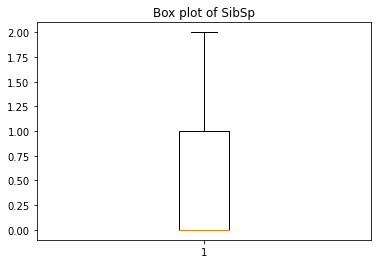

In [211]:
plt.boxplot(data_set1['SibSp'])
plt.title('Box plot of SibSp')

#### Next, we can plot the Box plot of Pclass

Text(0.5, 1.0, 'Box plot of Pclass')

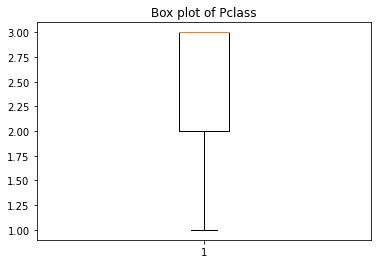

In [212]:
plt.boxplot(data_set1['Pclass'])
plt.title('Box plot of Pclass')

In [213]:
Q1=np.percentile(data_set1['Pclass'],25,interpolation='midpoint')
Q2=np.percentile(data_set1['Pclass'],50,interpolation='midpoint')
Q3=np.percentile(data_set1['Pclass'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

Q1 =  2.0
Q2 =  3.0
Q3 =  3.0


In [214]:
IQR = Q3-Q1
low_lim = Q1-(1.5*IQR)
up_lim = Q3+(1.5*IQR)
print ('IQR =',IQR)
print ('Lower limit =',low_lim)
print ('Upper limit =',up_lim)

IQR = 1.0
Lower limit = 0.5
Upper limit = 4.5


In [215]:
outlier = []
for x in data_set1['Pclass']:
  if ((x > up_lim) or (x < low_lim)): 
    outlier.append(x)
outlier

[]

Thus, there are no outliers for Pclass

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

#### Min Max Scaling rescales a feature or observation value with distribution value between 0 and 1

In [216]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

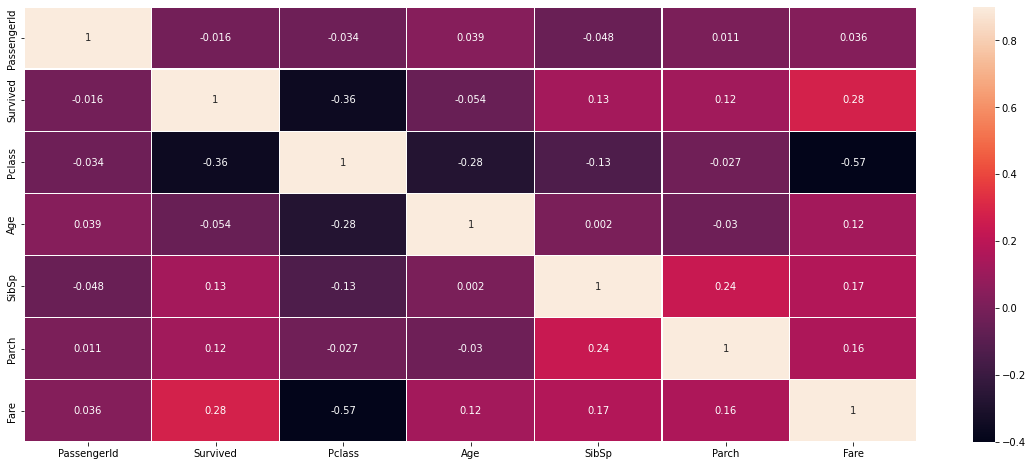

In [217]:
corrmatrix=data_set1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=0.2)

In [218]:
y=data_set1['Survived']
X=data_set1.drop(['Survived','Name','Ticket','Cabin','Embarked','Sex'],axis=1)
X.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,450.604326,2.318066,29.114504,0.311705,0.296438,30.295599
std,255.379119,0.828231,9.814762,0.527743,0.757073,48.962228
min,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,232.750000,2.000000,23.125000,0.000000,0.000000,7.895800
50%,449.500000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,670.750000,3.000000,34.000000,1.000000,0.000000,27.750000
max,891.000000,3.000000,54.000000,2.000000,6.000000,512.329200


In [220]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5
count,786.000000,786.000000,786.000000,786.000000,786.000000,786.000000
mean,0.505173,0.659033,0.512049,0.155852,0.049406,0.059133
std,0.286943,0.414115,0.192446,0.263871,0.126179,0.095568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.260393,0.500000,0.394608,0.000000,0.000000,0.015412
50%,0.503933,1.000000,0.490196,0.000000,0.000000,0.025374
75%,0.752528,1.000000,0.607843,0.500000,0.000000,0.054164
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [221]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print('MSE is:', mean_squared_error(y_test,predictions))
print('R-squared value is:' ,r2_score(y_test,predictions))

MSE is: 0.18473819985767187
R-squared value is: 0.225167267935665


#### The MSE value obtained is 0.18473819985767187 and R squared value is 0.225167267935665